<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

#Этапы работы:
**1. Получите данные и загрузите их в рабочую среду.**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target 

**2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
# пропусков нет
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [4]:
# строим модель
model = LinearRegression().fit(X_train, y_train)

In [5]:
# вычисляем метрики
pd.DataFrame({'Обучение':[mean_squared_error(y_train, model.predict(X_train), squared=False), 
                          r2_score(y_train, model.predict(X_train))], 
              'Тест':[mean_squared_error(y_test, model.predict(X_test), squared=False), 
                      r2_score(y_test, model.predict(X_test))]}, 
             index = ['RMSE', 'R2'])

,Обучение,Тест
RMSE,0.720838,0.745822
R2,0.607135,0.593177


**5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

<Axes: >

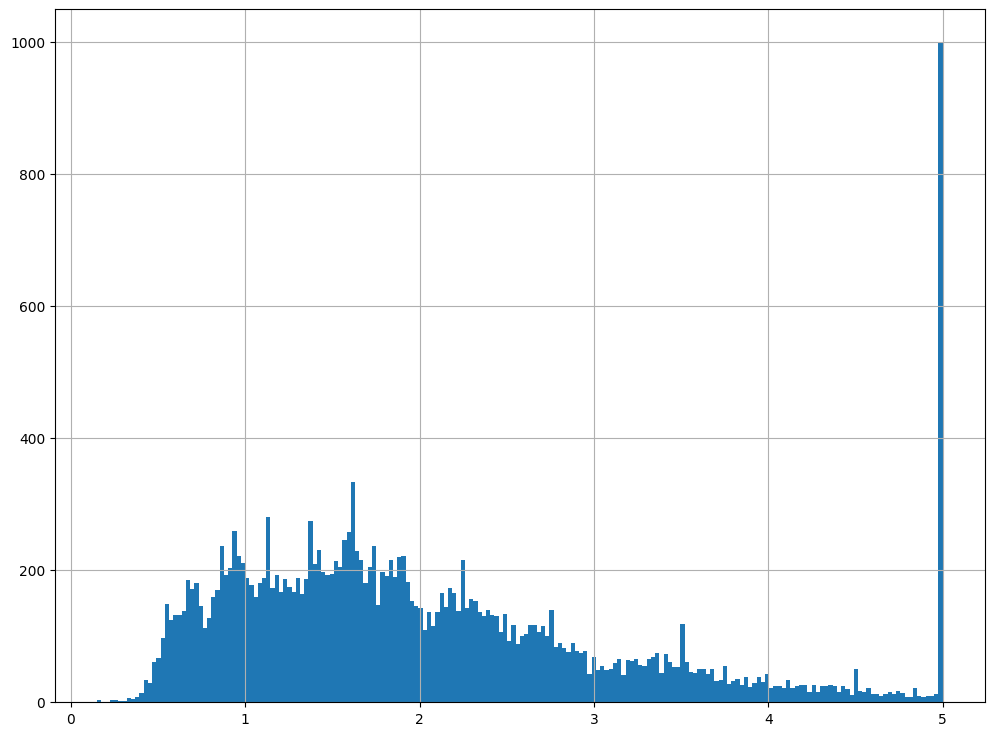

In [27]:
y.hist(bins=200, figsize=(12,9))

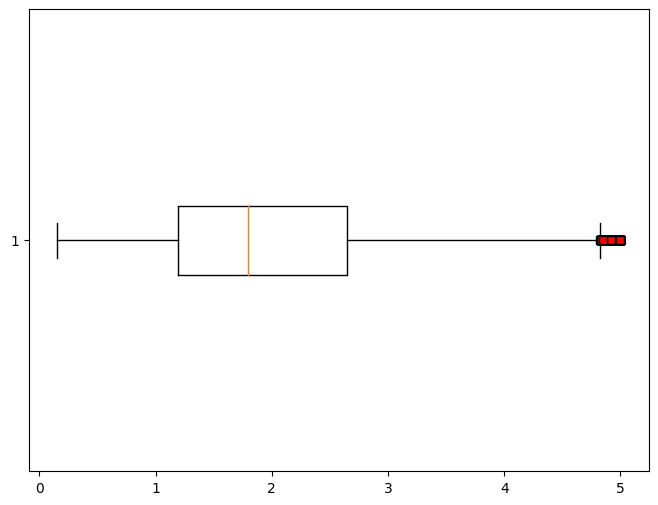

In [29]:
red_square = dict(markerfacecolor='r', marker='s') # выделим предполагаемые выбросы
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(y, vert=False, flierprops=red_square)
plt.show()

Можно предположить, что выбросы присутствуют, при значении целевой переменной более 4.8

**6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.   
a. Сделайте выводы.   
b. Удалите признаки на основании полученных значений, выводов.   
c. Повторите п. 3, п. 4 на измененных данных.**

**7. Исследуйте оставленные признаки на выбросы.  
a. Удалите выбросы в случае обнаружения.  
b. Повторите п. 3, п. 4 на измененных данных.**

Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.